In [3]:
import os
from collections import OrderedDict,Counter,defaultdict
import collections
from __future__ import division
import pandas as pd
import numpy as np
import vcf
from operator import itemgetter
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
%matplotlib inline
import math
from os import path as op
from os import listdir as ls
from IPython.display import display
from matplotlib.backends.backend_pdf import PdfPages

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: license expired

    the package numpy 1.10.2 was published on 2015-12-14,
    however the mkl license expiration date is 2015-05-28.
    You may be able to run earlier versions of numpy using your
    current license.  A new license can be purchased at: http://continuum.io
    To revert to an earlier set of conda packages, use:
    $ conda list --revisions
    ...
    $ conda install --revision <REVISION NUMBER>

    


# heatmap of pops vs ann ppt

In [29]:
#made in 08_bayenv2.ipynb
envf = pd.read_csv('/home/lindb/wbp/bayenv2/ENVIRONFILE_headerIDX.txt',header=0,index_col=0,sep='\t')
envf

,Dicks_Pass,Freel_Peak,Heavenly,Little_Round_Top,Mt_Rose_Ophir,Rifle_Peak,Snow_Valley_Peak,West_Shore_Peaks
AWS0-25,-0.203570,-0.389380,-1.384005,0.474087,0.430367,0.299207,1.982420,-1.209126
AWS0-50,-0.035349,-0.578405,-1.156498,0.239933,-0.030344,0.510211,2.176919,-1.126467
Ann-ppt,1.621491,-0.620322,-1.416888,0.058608,-0.059028,0.260270,-1.124478,1.280346
CEC,-0.519958,-0.162005,-0.519958,2.565848,0.195949,-0.519958,-0.519958,-0.519958
Clay,-0.111761,-0.739189,-0.049018,2.429323,-1.209760,-0.033332,-0.017646,-0.268618
Elev,-0.003848,1.073662,0.821217,1.270692,-1.653978,0.223968,-1.235288,-0.496424
GDD-Aug,0.934437,-1.786280,0.442116,-1.242137,0.960348,-0.620259,0.778967,0.532807
GDD-May,-0.649369,-0.649369,0.949078,-0.649369,2.281117,-0.649369,-0.249757,-0.382961
Lat,-0.576210,-0.851775,-0.428441,-1.473446,1.431077,1.398217,0.729649,-0.229072
Lon,-1.511918,0.796321,0.849157,-0.682730,0.861823,0.054377,1.057400,-1.424429


In [12]:
dist = {}
for env in envf.index:
    dist[env] = {}
    for pop in envf.columns:
        dist[env][pop] = envf.loc[env,pop]

In [31]:
from scipy.stats import spearmanr

In [32]:
spearmanr(dist['Ann-ppt'].values(),dist['Lon'].values())

SpearmanrResult(correlation=-0.85714285714285721, pvalue=0.0065300172547152922)

In [33]:
spearmanr(dist['Ann-ppt'].values(),dist['Elev'].values())

SpearmanrResult(correlation=-0.095238095238095233, pvalue=0.82250543020361144)

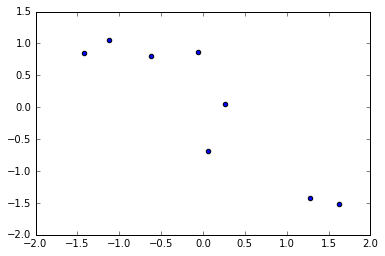

In [35]:
plt.scatter(dist['Ann-ppt'].values(),dist['Lon'].values())

In [52]:
loc = {'Rifle_Peak': [39.286262, -119.9822649], 
'Mt_Rose_Ophir': [39.2893711, -119.907125],
'Snow_Valley_Peak': [39.1588193, -119.8860493],
'Freel_Peak': [38.8611931, -119.9091713],
'Little_Round_Top': [38.7369475, -120.0545048],
'Dicks_Pass': [38.9039739, -120.1336446],
'Heavenly': [38.9368189, -119.9063352],
'West_Shore_Peaks': [38.9737194, -120.1240533]   
}

In [38]:
loc['Rifle_Peak'][0],loc['Rifle_Peak'][1]

(39.2839081, -119.98260160000001)

In [49]:
type(loc['Rifle_Peak'][1])

float

In [58]:
max(dist['Ann-ppt'].values())

1.62149127403

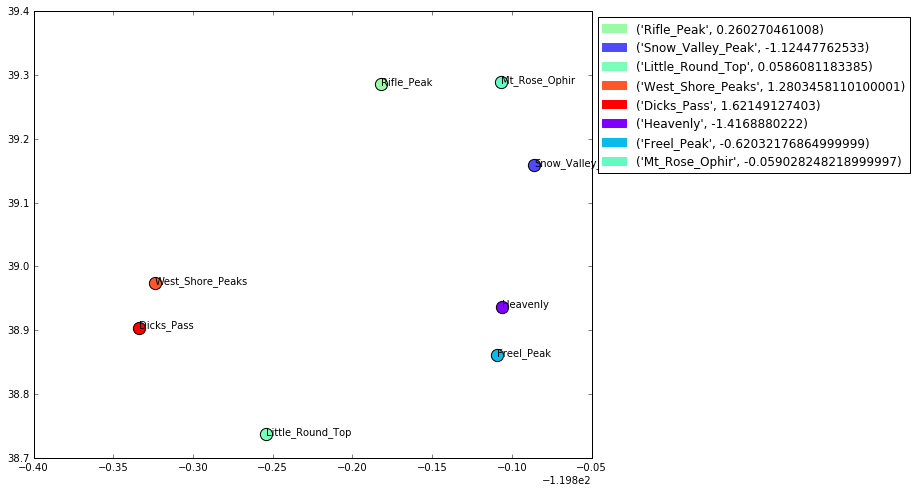

In [70]:
with PdfPages('/home/lindb/wbp/figures/ann-ppt_vs_lat-long.pdf') as pdf:
    norm = mcolors.Normalize(min(dist['Ann-ppt'].values()), max(dist['Ann-ppt'].values()))
    legend = {}
    for pop in sorted(loc):
        n = norm(dist['Ann-ppt'][pop])
        color = cm.rainbow(n)
        legend[pop] = color
        plt.scatter(loc[pop][1],
                    loc[pop][0],
                    s=150,
                    c=color
                   )
    fig = plt.gcf()
    ax = plt.gca()
    cmap = plt.get_cmap()
    fig.set_size_inches(10,8)
    handles=[]
    for pop in sorted(legend):
        handles.append(mpatches.Patch(color=legend[pop], label=(pop, dist['Ann-ppt'][pop])))
    for pop in legend:
        ax.annotate(pop,(loc[pop][1],loc[pop][0]))
    plt.legend(handles=sorted(handles), loc=2,bbox_to_anchor=(1, 1))
    plt.show()
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    fig.set_size_inches(6,5)
    pdf.savefig(fig,bbox_inches='tight')

In [ ]:
fig = plt.gcf()
ax = plt.gca()
cmap = plt.get_cmap()
fig.set_size_inches(10,8)
plt.title("PCA of n=%d imputed samples for gemma on %d loci across 6 populations" % (len(impPCs), len(imp_std.columns)))
#0.05294  0.01079
#0.02051  0.01083
imp = summary(imp_res).rx("importance")[0]
plt.xlabel("PC1 (%g)" % imp.rx(2,1)[0])
plt.ylabel("PC2 (%g)" % imp.rx(2,2)[0])
handles = []
for pop in sorted(legend):
    handles.append(mpatches.Patch(color=legend[pop], label=pop))
plt.legend(handles=sorted(handles), loc=2,bbox_to_anchor=(1, 1))

plt.show()

# violin plot

In [4]:
hyp_files = defaultdict(list,
            {'bfpopx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/bfpopx_bslmm_1_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/bfpopx_bslmm_3_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/bfpopx_bslmm_2_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/bfpopx_bslmm_4_out_50mil.hyp.txt'],
             'c13popx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/c13popx_bslmm_1_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/c13popx_bslmm_3_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/c13popx_bslmm_2_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/c13popx_bslmm_4_out_50mil.hyp.txt'],
             'htpopx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/htpopx_bslmm_1_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/htpopx_bslmm_3_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/htpopx_bslmm_2_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/htpopx_bslmm_4_out_50mil.hyp.txt'],
             'n15popx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/n15popx_bslmm_1_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/n15popx_bslmm_3_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/n15popx_bslmm_2_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/n15popx_bslmm_4_out_50mil.hyp.txt'],
             'rspopx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/rspopx_bslmm_1_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/rspopx_bslmm_3_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/rspopx_bslmm_2_out_50mil.hyp.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/rspopx_bslmm_4_out_50mil.hyp.txt']})

In [5]:
param_files = defaultdict(list,
            {'bfpopx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/bfpopx_bslmm_1_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/bfpopx_bslmm_3_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/bfpopx_bslmm_2_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/bfpopx_bslmm_4_out_50mil.param.txt'],
             'c13popx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/c13popx_bslmm_1_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/c13popx_bslmm_3_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/c13popx_bslmm_2_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/c13popx_bslmm_4_out_50mil.param.txt'],
             'htpopx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/htpopx_bslmm_1_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/htpopx_bslmm_3_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/htpopx_bslmm_2_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/htpopx_bslmm_4_out_50mil.param.txt'],
             'n15popx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/n15popx_bslmm_1_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/n15popx_bslmm_3_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/n15popx_bslmm_2_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/n15popx_bslmm_4_out_50mil.param.txt'],
             'rspopx': ['/home/lindb/wbp/gemma/infiles/bslmm/output/rspopx_bslmm_1_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/rspopx_bslmm_3_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/rspopx_bslmm_2_out_50mil.param.txt',
              '/home/lindb/wbp/gemma/infiles/bslmm/output/rspopx_bslmm_4_out_50mil.param.txt']})

In [6]:
def get_hyp_dfs(files):
    dfs = {}
    for pheno, filelist in files.items():
        dfs[pheno] = pd.DataFrame()
        df = None
        fcount = 0
        for f in sorted(filelist):
            fdata = os.path.basename(f).split(".")[0].split("_")
            num = int(fdata[2])
            
            if fcount == 0:
                df = pd.read_csv(f, sep="\t")
                df.columns = ['%s_%s' % (col,num) for col in df.columns]
            else:
                newdf = pd.read_csv(f, sep="\t")
                newdf.columns = ["%s_%s" % (col,num) for col in newdf.columns]
                df = pd.merge(df,newdf,left_index=True,right_index=True)
            fcount += 1
        df = df.apply(pd.to_numeric, errors="ignore")
        dfs[pheno] = df
    return dfs
hyp_dfs = get_hyp_dfs(hyp_files)

In [7]:
hyp_dfs['bfpopx'].head()

,h_1,pve_1,rho_1,pge_1,pi_1,n_gamma_1,h_2,pve_2,rho_2,pge_2,...,rho_3,pge_3,pi_3,n_gamma_3,h_4,pve_4,rho_4,pge_4,pi_4,n_gamma_4
0,0.220253,0.231943,0.410713,0.443830,0.001884,220.0,0.267925,0.291488,0.674529,0.614970,...,0.569785,0.648057,0.001008,117.0,0.267925,0.291488,0.674529,0.614970,0.001550,158.0
1,0.450946,0.416229,0.617552,0.646631,0.001930,229.0,0.401846,0.335596,0.492682,0.477998,...,0.359418,0.264804,0.001061,103.0,0.401846,0.335596,0.492682,0.477998,0.001541,176.0
2,0.202163,0.179139,0.656780,0.554563,0.001746,202.0,0.211270,0.215039,0.398028,0.504549,...,0.447940,0.438302,0.001059,110.0,0.211270,0.215039,0.398028,0.504549,0.001856,185.0
3,0.183005,0.164360,0.442000,0.458563,0.001426,195.0,0.566320,0.551887,0.378794,0.430254,...,0.489446,0.525387,0.001152,143.0,0.566320,0.551887,0.378794,0.430254,0.001794,207.0
4,0.067618,0.062976,0.163403,0.160793,0.001379,184.0,0.353257,0.378838,0.369870,0.428792,...,0.152600,0.153034,0.001243,151.0,0.353257,0.378838,0.369870,0.428792,0.001651,215.0


In [8]:
def get_hmean_row(row):
    try:
        return sp.stats.hmean(row)
    except ValueError as e:
        return np.nan   

def get_hmean(param):
    d = {}
    for pheno in hyp_dfs: #for use with ngamma_dfs
    #for pheno in param_dfs:
        df = hyp_dfs[pheno]
        g = pd.DataFrame(df[[col for col in df.columns if param in col]])
        #m = g.apply(get_hmean_row, axis=1)
        m = g.apply(np.mean, axis=1)
        g['%s_hmean' % param] = m
        d[pheno] = g
    return d

ngamma_dfs = get_hmean('gamma')

In [18]:
pheno = 'rspopx'

In [17]:
rho_dfs = get_hmean('rho') 
rho_dfs['rspopx'].head()

,rho_1,rho_2,rho_3,rho_4,rho_hmean
0,0.495398,0.916803,0.916803,0.431246,0.690063
1,0.950799,0.838154,0.838154,0.210276,0.709346
2,0.740808,0.658635,0.658635,0.315019,0.593274
3,0.356586,0.569538,0.569538,0.343518,0.459795
4,0.008016,0.262542,0.262542,0.645753,0.294713


In [19]:
pge_dfs = get_hmean('pge')
pge_dfs[pheno].head()

,pge_1,pge_2,pge_3,pge_4,pge_hmean
0,0.479972,0.934036,0.934036,0.520338,0.717095
1,0.953320,0.816456,0.816456,0.264439,0.712668
2,0.774475,0.677189,0.677189,0.307974,0.609207
3,0.370574,0.526767,0.526767,0.225275,0.412346
4,0.007988,0.223424,0.223424,0.602190,0.264256


In [20]:
pve_dfs = get_hmean('pve')
pve_dfs['rspopx'].head()

,pve_1,pve_2,pve_3,pve_4,pve_hmean
0,0.390095,0.427651,0.427651,0.380257,0.406414
1,0.356403,0.416884,0.416884,0.248368,0.359635
2,0.322908,0.350035,0.350035,0.245457,0.317109
3,0.206704,0.353308,0.353308,0.431532,0.336213
4,0.365853,0.139653,0.139653,0.473148,0.279577


In [10]:
ngamma_dfs['rspopx'].head()

,n_gamma_1,n_gamma_2,n_gamma_3,n_gamma_4,gamma_hmean
0,156.0,163.0,163.0,164.0,161.50
1,171.0,146.0,146.0,150.0,153.25
2,181.0,151.0,151.0,149.0,158.00
3,190.0,168.0,168.0,140.0,166.50
4,210.0,171.0,171.0,137.0,172.25


In [47]:
for pheno in sorted(ngamma_dfs):
    print pheno, np.mean(ngamma_dfs[pheno]['gamma_hmean'])

bfpopx 192.142415
c13popx 190.29327
htpopx 191.79638
n15popx 193.68265
rspopx 194.051105


In [21]:
import seaborn as sns

In [12]:
sns.__version__

'0.7.0'

In [11]:
phenos = sorted(['n15popx', 'c13popx', 'htpopx', 'bfpopx', 'rspopx'])

In [14]:
phenos

['bfpopx', 'c13popx', 'htpopx', 'n15popx', 'rspopx']

In [22]:
combined_dfs={}
for pheno in phenos:
    filE = '/home/lindb/wbp/gemma/infiles/bslmm/output/%s_combined_df.txt' % pheno
    combined_dfs[pheno] = pd.read_csv(filE,header=0,index_col=0,sep='\t')
combined_dfs[pheno].head()

,alpha_hmean,beta_hmean,gamma_hmean,total_effect,model_averaged
rs,,,,,
NODE_1000013_length_91_cov_1.802198_37,0.000089,0.033259,0.001765,0.033348,0.000148
NODE_1000031_length_98_cov_2.000000_30,0.000024,0.011842,0.001620,0.011866,0.000043
NODE_1000037_length_93_cov_2.043011_33,0.000016,0.004484,0.001635,0.004500,0.000023
NODE_1000042_length_93_cov_1.118280_100,0.000009,0.001231,0.001680,0.001240,0.000011
NODE_1000053_length_94_cov_1.744681_25,0.000008,0.001378,0.001835,0.001386,0.000010


In [51]:
ngamma_dfs['bfpopx'].head()

,n_gamma_1,n_gamma_2,n_gamma_3,n_gamma_4,gamma_hmean
0,220.0,158.0,117.0,158.0,163.25
1,229.0,176.0,103.0,176.0,171.00
2,202.0,185.0,110.0,185.0,170.50
3,195.0,207.0,143.0,207.0,188.00
4,184.0,215.0,151.0,215.0,191.25


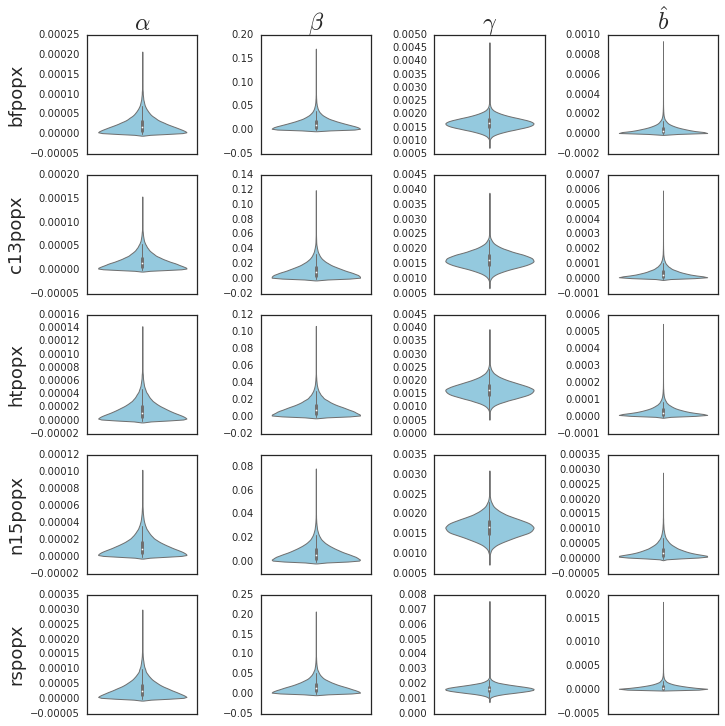

In [33]:
sns.set_style("white")
f, axes = plt.subplots(nrows=5, ncols=4, sharex=True)
f.set_size_inches(10, 10)
color="skyblue"
titlesize=24
labelsize=18
linewidth=1
sns.violinplot(x="alpha_hmean", data=pd.DataFrame(combined_dfs["bfpopx"]['alpha_hmean']), orient="v", ax=axes[0,0], color=color, linewidth=linewidth)
sns.violinplot(x="beta_hmean", data=pd.DataFrame(combined_dfs["bfpopx"]['beta_hmean']), orient="v", ax=axes[0,1], color=color, linewidth=linewidth)
sns.violinplot(x="gamma_hmean", data=pd.DataFrame(combined_dfs["bfpopx"]['gamma_hmean']), orient="v", ax=axes[0,2], color=color, linewidth=linewidth)
sns.violinplot(x="model_averaged", data=pd.DataFrame(combined_dfs["bfpopx"]['model_averaged']), orient="v", ax=axes[0,3], color=color, linewidth=linewidth)

sns.violinplot(x="alpha_hmean", data=pd.DataFrame(combined_dfs["c13popx"]['alpha_hmean']), orient="v", ax=axes[1,0], color=color, linewidth=linewidth)
sns.violinplot(x="beta_hmean", data=pd.DataFrame(combined_dfs["c13popx"]['beta_hmean']), orient="v", ax=axes[1,1], color=color, linewidth=linewidth)
sns.violinplot(x="gamma_hmean", data=pd.DataFrame(combined_dfs["c13popx"]['gamma_hmean']), orient="v", ax=axes[1,2], color=color, linewidth=linewidth)
sns.violinplot(x="model_averaged", data=pd.DataFrame(combined_dfs["c13popx"]['model_averaged']), orient="v", ax=axes[1,3], color=color, linewidth=linewidth)

sns.violinplot(x="alpha_hmean", data=pd.DataFrame(combined_dfs["htpopx"]['alpha_hmean']), orient="v", ax=axes[2,0], color=color, linewidth=linewidth)
sns.violinplot(x="beta_hmean", data=pd.DataFrame(combined_dfs["htpopx"]['beta_hmean']), orient="v", ax=axes[2,1], color=color, linewidth=linewidth)
sns.violinplot(x="gamma_hmean", data=pd.DataFrame(combined_dfs["htpopx"]['gamma_hmean']), orient="v", ax=axes[2,2], color=color, linewidth=linewidth)
sns.violinplot(x="model_averaged", data=pd.DataFrame(combined_dfs["htpopx"]['model_averaged']), orient="v", ax=axes[2,3], color=color, linewidth=linewidth)

sns.violinplot(x="alpha_hmean", data=pd.DataFrame(combined_dfs["n15popx"]['alpha_hmean']), orient="v", ax=axes[3,0], color=color, linewidth=linewidth)
sns.violinplot(x="beta_hmean", data=pd.DataFrame(combined_dfs["n15popx"]['beta_hmean']), orient="v", ax=axes[3,1], color=color, linewidth=linewidth)
sns.violinplot(x="gamma_hmean", data=pd.DataFrame(combined_dfs["n15popx"]['gamma_hmean']), orient="v", ax=axes[3,2], color=color, linewidth=linewidth)
sns.violinplot(x="model_averaged", data=pd.DataFrame(combined_dfs["n15popx"]['model_averaged']), orient="v", ax=axes[3,3], color=color, linewidth=linewidth)

sns.violinplot(x="alpha_hmean", data=pd.DataFrame(combined_dfs["rspopx"]['alpha_hmean']), orient="v", ax=axes[4,0], color=color, linewidth=linewidth)
sns.violinplot(x="beta_hmean", data=pd.DataFrame(combined_dfs["rspopx"]['beta_hmean']), orient="v", ax=axes[4,1], color=color, linewidth=linewidth)
sns.violinplot(x="gamma_hmean", data=pd.DataFrame(combined_dfs["rspopx"]['gamma_hmean']), orient="v", ax=axes[4,2], color=color, linewidth=linewidth)
sns.violinplot(x="model_averaged", data=pd.DataFrame(combined_dfs["rspopx"]['model_averaged']), orient="v", ax=axes[4,3], color=color, linewidth=linewidth)

axes[0,0].set_title(r"$\alpha$", fontsize=titlesize)
axes[0,1].set_title(r"$\beta$", fontsize=titlesize)
axes[0,2].set_title(r"$\gamma$", fontsize=titlesize)
axes[0,3].set_title(r"$\hat{b}$", fontsize=titlesize)


axes[0,0].set_ylabel("bfpopx", fontsize=labelsize)
axes[0,1].set_ylabel("")
axes[0,2].set_ylabel("")
axes[0,3].set_ylabel("")


axes[1,0].set_ylabel("c13popx", fontsize=labelsize)
axes[1,1].set_ylabel("")
axes[1,2].set_ylabel("")
axes[1,3].set_ylabel("")


axes[2,0].set_ylabel("htpopx", fontsize=labelsize)
axes[2,1].set_ylabel("")
axes[2,2].set_ylabel("")
axes[2,3].set_ylabel("")


axes[3,0].set_ylabel("n15popx", fontsize=labelsize)
axes[3,1].set_ylabel("")
axes[3,2].set_ylabel("")
axes[3,3].set_ylabel("")


axes[4,0].set_ylabel("rspopx", fontsize=labelsize)
axes[4,1].set_ylabel("")
axes[4,2].set_ylabel("")
axes[4,3].set_ylabel("")



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.tight_layout()
plt.savefig("/home/lindb/wbp/figures/gemma_violinplot_abgbnsnps.pdf")
plt.show()

In [19]:
sns.__version__

'0.7.0'

In [72]:
ngamma_dfs[pheno].head()

,n_gamma_1,n_gamma_2,n_gamma_3,n_gamma_4,gamma_hmean
0,156.0,163.0,163.0,164.0,161.50
1,171.0,146.0,146.0,150.0,153.25
2,181.0,151.0,151.0,149.0,158.00
3,190.0,168.0,168.0,140.0,166.50
4,210.0,171.0,171.0,137.0,172.25


In [80]:
pve_dfs[pheno].head()

,pve_1,pve_2,pve_3,pve_4,pve_hmean
0,0.390095,0.427651,0.427651,0.380257,0.406414
1,0.356403,0.416884,0.416884,0.248368,0.359635
2,0.322908,0.350035,0.350035,0.245457,0.317109
3,0.206704,0.353308,0.353308,0.431532,0.336213
4,0.365853,0.139653,0.139653,0.473148,0.279577


In [81]:
pge_dfs[pheno].head()

,pge_1,pge_2,pge_3,pge_4,pge_hmean
0,0.479972,0.934036,0.934036,0.520338,0.717095
1,0.953320,0.816456,0.816456,0.264439,0.712668
2,0.774475,0.677189,0.677189,0.307974,0.609207
3,0.370574,0.526767,0.526767,0.225275,0.412346
4,0.007988,0.223424,0.223424,0.602190,0.264256


In [82]:
rho_dfs[pheno].head()

,rho_1,rho_2,rho_3,rho_4,rho_hmean
0,0.495398,0.916803,0.916803,0.431246,0.690063
1,0.950799,0.838154,0.838154,0.210276,0.709346
2,0.740808,0.658635,0.658635,0.315019,0.593274
3,0.356586,0.569538,0.569538,0.343518,0.459795
4,0.008016,0.262542,0.262542,0.645753,0.294713


In [85]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


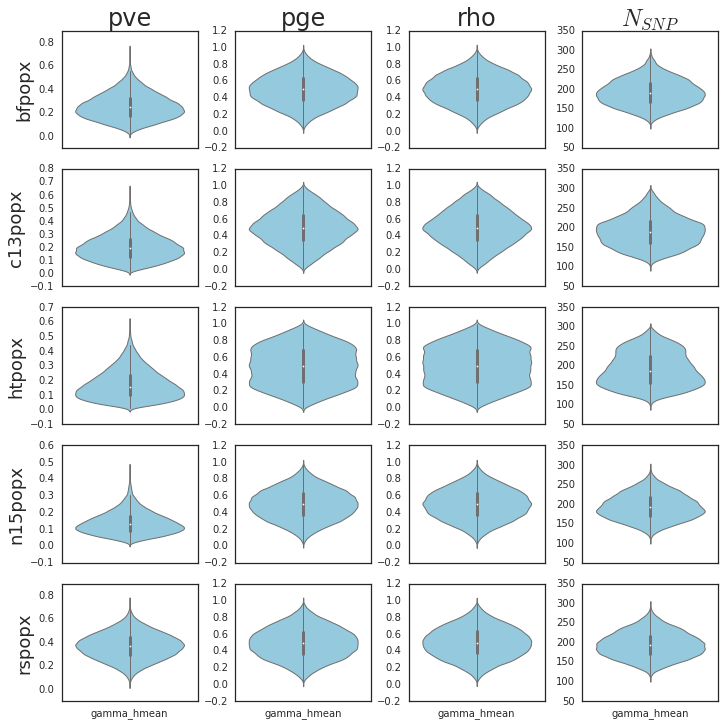

In [42]:
sns.set_style("white")
f, axes = plt.subplots(nrows=5, ncols=4, sharex=True)
f.set_size_inches(10, 10)
color="skyblue"
titlesize=24
labelsize=18
linewidth=1
sns.violinplot(x="pve_hmean", data=pd.DataFrame(pve_dfs["bfpopx"]['pve_hmean']), orient="v", ax=axes[0,0], color=color, linewidth=linewidth)
sns.violinplot(x="pge_hmean", data=pd.DataFrame(pge_dfs["bfpopx"]['pge_hmean']), orient="v", ax=axes[0,1], color=color, linewidth=linewidth)
sns.violinplot(x="rho_hmean", data=pd.DataFrame(rho_dfs["bfpopx"]['rho_hmean']), orient="v", ax=axes[0,2], color=color, linewidth=linewidth)
sns.violinplot(pd.DataFrame(ngamma_dfs['bfpopx']['gamma_hmean']), orient="v", ax=axes[0,3], color=color, linewidth=linewidth)

sns.violinplot(x="pve_hmean", data=pd.DataFrame(pve_dfs["c13popx"]['pve_hmean']), orient="v", ax=axes[1,0], color=color, linewidth=linewidth)
sns.violinplot(x="pge_hmean", data=pd.DataFrame(pge_dfs["c13popx"]['pge_hmean']), orient="v", ax=axes[1,1], color=color, linewidth=linewidth)
sns.violinplot(x="rho_hmean", data=pd.DataFrame(rho_dfs["c13popx"]['rho_hmean']), orient="v", ax=axes[1,2], color=color, linewidth=linewidth)
sns.violinplot(pd.DataFrame(ngamma_dfs['c13popx']['gamma_hmean']), orient="v", ax=axes[1,3], color=color, linewidth=linewidth)

sns.violinplot(x="pve_hmean", data=pd.DataFrame(pve_dfs["htpopx"]['pve_hmean']), orient="v", ax=axes[2,0], color=color, linewidth=linewidth)
sns.violinplot(x="pge_hmean", data=pd.DataFrame(pge_dfs["htpopx"]['pge_hmean']), orient="v", ax=axes[2,1], color=color, linewidth=linewidth)
sns.violinplot(x="rho_hmean", data=pd.DataFrame(rho_dfs["htpopx"]['rho_hmean']), orient="v", ax=axes[2,2], color=color, linewidth=linewidth)
sns.violinplot(pd.DataFrame(ngamma_dfs['htpopx']['gamma_hmean']), orient="v", ax=axes[2,3], color=color, linewidth=linewidth)

sns.violinplot(x="pve_hmean", data=pd.DataFrame(pve_dfs["n15popx"]['pve_hmean']), orient="v", ax=axes[3,0], color=color, linewidth=linewidth)
sns.violinplot(x="pge_hmean", data=pd.DataFrame(pge_dfs["n15popx"]['pge_hmean']), orient="v", ax=axes[3,1], color=color, linewidth=linewidth)
sns.violinplot(x="rho_hmean", data=pd.DataFrame(rho_dfs["n15popx"]['rho_hmean']), orient="v", ax=axes[3,2], color=color, linewidth=linewidth)
sns.violinplot(pd.DataFrame(ngamma_dfs['n15popx']['gamma_hmean']), orient="v", ax=axes[3,3], color=color, linewidth=linewidth)

sns.violinplot(x="pve_hmean", data=pd.DataFrame(pve_dfs["rspopx"]['pve_hmean']), orient="v", ax=axes[4,0], color=color, linewidth=linewidth)
sns.violinplot(x="pge_hmean", data=pd.DataFrame(pge_dfs["rspopx"]['pge_hmean']), orient="v", ax=axes[4,1], color=color, linewidth=linewidth)
sns.violinplot(x="rho_hmean", data=pd.DataFrame(rho_dfs["rspopx"]['rho_hmean']), orient="v", ax=axes[4,2], color=color, linewidth=linewidth)
sns.violinplot(pd.DataFrame(ngamma_dfs['rspopx']['gamma_hmean']), orient="v", ax=axes[4,3], color=color, linewidth=linewidth)

axes[0,0].set_title(r"pve", fontsize=titlesize)
axes[0,1].set_title(r"pge", fontsize=titlesize)
axes[0,2].set_title(r"rho", fontsize=titlesize)
axes[0,3].set_title(r'$N_{SNP}$',fontsize=titlesize)



axes[0,0].set_ylabel("bfpopx", fontsize=labelsize)
axes[0,1].set_ylabel("")
axes[0,2].set_ylabel("")


axes[1,0].set_ylabel("c13popx", fontsize=labelsize)
axes[1,1].set_ylabel("")
axes[1,2].set_ylabel("")


axes[2,0].set_ylabel("htpopx", fontsize=labelsize)
axes[2,1].set_ylabel("")
axes[2,2].set_ylabel("")


axes[3,0].set_ylabel("n15popx", fontsize=labelsize)
axes[3,1].set_ylabel("")
axes[3,2].set_ylabel("")


axes[4,0].set_ylabel("rspopx", fontsize=labelsize)
axes[4,1].set_ylabel("")
axes[4,2].set_ylabel("")



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.tight_layout()
plt.savefig("/home/lindb/wbp/figures/gemma_violinplot_pge_pve_rho.pdf")
plt.show()

In [25]:
trans = {'bfpopx':r"Bud flush",
         'c13popx':r'$\delta^{13}C$',
         'htpopx':r'Height',
         'rspopx':r'Root:shoot',
         'n15popx':r'$\delta^{15}N$'}
trans['bfpopx']

'Bud flush'

In [26]:
pves = pd.DataFrame()
nsnps = pd.DataFrame()
for pheno in pve_dfs:
    pves[trans[pheno]] = pve_dfs[pheno]['pve_hmean']
    nsnps[trans[pheno]]= ngamma_dfs[pheno]['gamma_hmean']
pves.head()

,Bud flush,$\delta^{15}N$,$\delta^{13}C$,Root:shoot,Height
0,0.250027,0.093988,0.201753,0.406414,0.201511
1,0.286353,0.079118,0.225396,0.359635,0.111065
2,0.300280,0.216408,0.343098,0.317109,0.058424
3,0.428892,0.088167,0.047301,0.336213,0.189384
4,0.255237,0.285285,0.195047,0.279577,0.133001


In [81]:
nsnps.head()

,Bud flush,$\delta^{15}N$,$\delta^{13}C$,Root:shoot,Height
0,163.25,177.75,189.0,161.50,151.25
1,171.00,180.50,186.0,153.25,154.25
2,170.50,182.00,190.5,158.00,162.00
3,188.00,188.00,184.5,166.50,154.75
4,191.25,179.25,187.0,172.25,155.25


In [94]:
type(nsnps)

pandas.core.frame.DataFrame

In [125]:
labelsize

18

In [129]:
[x for x in pves]

['Bud flush', '$\\delta^{15}N$', '$\\delta^{13}C$', 'Root:shoot', 'Height']

In [30]:
labelsize=18

In [28]:
rc = {'axes.labelsize': 11.0,
 'axes.titlesize': 12.0,
 'figure.figsize': [8.0, 5.5],
 'font.size': 12.0,
 'grid.linewidth': 1.0,
 'legend.fontsize': 10.0,
 'lines.linewidth': 1.75,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 7.0,
 'patch.linewidth': 0.3,
 'xtick.labelsize': 18.0,
 'xtick.major.pad': 7.0,
 'xtick.major.width': 1.0,
 'xtick.minor.width': 0.5,
 'ytick.labelsize': 10.0,
 'ytick.major.pad': 7.0,
 'ytick.major.width': 1.0,
 'ytick.minor.width': 0.5}

In [29]:
sns.set(rc=rc)

In [39]:
nsnps.columns

Index([u'$\delta^{13}C$', u'$\delta^{15}N$', u'Bud flush', u'Height',
       u'Root:shoot'],
      dtype='object')

In [41]:
cols = ['Bud flush',u'$\delta^{13}C$','Height',u'$\delta^{15}N$','Root:shoot']
nsnps = nsnps[[col for col in cols]]
pves = pves[[col for col in cols]]
nsnps.head()

,Bud flush,$\delta^{13}C$,Height,$\delta^{15}N$,Root:shoot
0,163.25,189.0,151.25,177.75,161.50
1,171.00,186.0,154.25,180.50,153.25
2,170.50,190.5,162.00,182.00,158.00
3,188.00,184.5,154.75,188.00,166.50
4,191.25,187.0,155.25,179.25,172.25


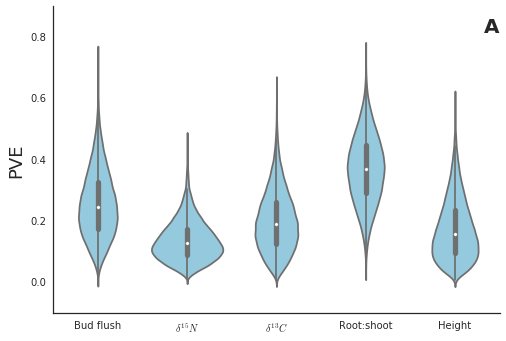

In [37]:
sns.set_style("white")
g= sns.violinplot(data=pves,color="skyblue",ylim=[0,1],fontsize=29)
g.set_ylabel('PVE',fontsize = labelsize)
g.spines["top"].set_visible(False)
g.spines["right"].set_visible(False)
g.set_title("A",y=0.9,loc='right',fontsize=20,fontweight='bold')
plt.savefig('/home/lindb/wbp/figures/gemma_violinplot_PVE.pdf')

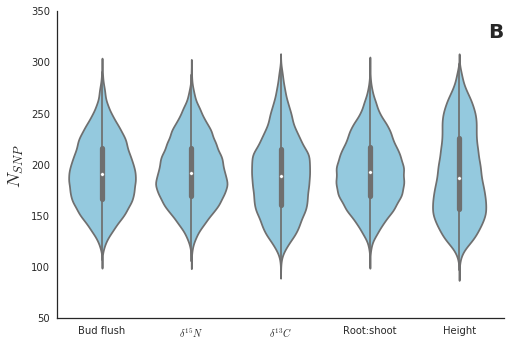

In [38]:
g= sns.violinplot(data=nsnps,color="skyblue",ylim=[0,1],fontsize=29)
g.set_ylabel(r'$N_{SNP}$',fontsize = labelsize)
g.spines["top"].set_visible(False)
g.spines["right"].set_visible(False)
g.set_title("B",y=0.9,loc='right',fontsize=20,fontweight='bold')
plt.savefig("/home/lindb/wbp/figures/gemma_violinplot_nsnps.pdf")

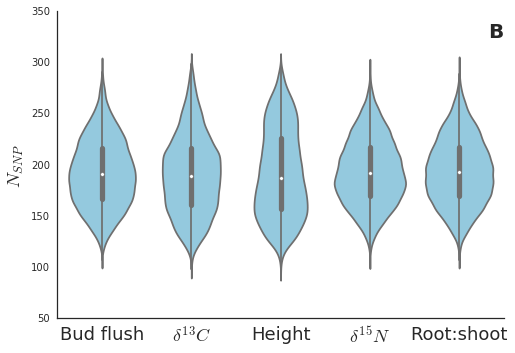

In [44]:
g= sns.violinplot(data=nsnps,color="skyblue",ylim=[0,1],fontsize=29)
g.set_ylabel(r'$N_{SNP}$',fontsize = labelsize)
g.spines["top"].set_visible(False)
g.spines["right"].set_visible(False)
g.set_title("B",y=0.9,loc='right',fontsize=20,fontweight='bold')
plt.savefig("/home/lindb/wbp/figures/gemma_violinplot_nsnps.pdf")

In [2]:
g= sns.violinplot(data=nsnps,color="skyblue",ylim=[0,1],fontsize=29)
g.set_ylabel(r'$N_{SNP}$',fontsize = labelsize)
g.spines["top"].set_visible(False)
g.spines["right"].set_visible(False)
g.set_title("B",y=0.9,loc='right',fontsize=20,fontweight='bold')
plt.savefig("/home/lindb/wbp/figures/gemma_violinplot_nsnps.pdf")

NameError: name 'sns' is not defined